In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
ep4 = pd.read_csv('/content/drive/MyDrive/bigdata_projects/Text Mining/data/SW_EpisodeIV.txt',sep=' ',on_bad_lines='skip')
ep5 = pd.read_csv('/content/drive/MyDrive/bigdata_projects/Text Mining/data/SW_EpisodeV.txt',sep=' ',on_bad_lines='skip')
ep6 = pd.read_csv('/content/drive/MyDrive/bigdata_projects/Text Mining/data/SW_EpisodeVI.txt',sep=' ',on_bad_lines='skip')


## Text Transformation

In [6]:
# general variables

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

pd.set_option('max_colwidth',200)

def clean_data(text_df):
  arr = []
  for i in range(0,len(text_df['dialogue'])):
    if i in text_df['dialogue']:
      arr.append(re.sub('[^a-zA-Z]',' ',text_df['dialogue'][i]).lower().split())
    else:
      arr.append(re.sub('[^a-zA-Z]',' ',text_df.iloc[i,:]['dialogue']).lower().split())
      # print(type(text_df.iloc[i,:]['dialogue']))
  for i in range(len(arr)):
    arr[i] = ' '.join([ps.stem(t) for t in arr[i] if t not in stop_words])

  return arr
# print(len(clean_data(ep6)))
# print(len(ep6))

In [7]:
def get_top_count_word(c):
  word_list = []
  dialogue_arr = pd.Series(c['dialogue']).tolist()

  for state in dialogue_arr:
    word_list.extend(state.split())
  
  word_seri = pd.Series(word_list)
  print(word_list)
  return word_seri.value_counts()

#print(get_top_count_word(ep4))

In [8]:
# function to calculate the bigrams
def cal_bigrams(text_df):
  text_seri = pd.Series(clean_data(text_df))
  cleaned_text = text_seri.str.split(expand=True).stack()

  i = cleaned_text + ' ' + cleaned_text.shift(-1)

  bigrams = i.dropna().reset_index(drop=True)
  return bigrams
# function to get most frequent bigrams
def most_freq_bigrams(freq_bigram):
  bigrams_arr = pd.Series(freq_bigram)
  count_bigrams = bigrams_arr.value_counts().head(20)

  return count_bigrams

In [9]:
# check dialogues
print(f'Total dialogues in ep4: {len(ep4.character.unique())}')
print(f'total dialoguw in ep4: {len(clean_data(ep4))}')

print(f'Total dialogues in ep5: {len(ep5.character.unique())}')
print(f'total dialoguw in ep5: {len(clean_data(ep5))}')

print(f'Total dialogues in ep6: {len(ep6.character.unique())}')
print(f'total dialoguw in ep6: {len(clean_data(ep6))}')


Total dialogues in ep4: 60
total dialoguw in ep4: 1009
Total dialogues in ep5: 49
total dialoguw in ep5: 838
Total dialogues in ep6: 53
total dialoguw in ep6: 672


### Function to create pandas Dataframe from top of 20 Character

In [10]:
def series_to_df(s):
  temp = pd.DataFrame(s)
  temp.reset_index(inplace=True)
  temp.columns = ['character','dialogue']

  return temp


Function to create pandas Dataframe from bigrams

In [11]:
def bigrams_series_to_df(s):
  temp = pd.DataFrame(s)
  temp.reset_index(inplace=True)
  temp.columns = ['bigram','frq']
 
  return temp

## create dataframe from character with new dialogue column

In [12]:
# get the top 20 character with cleaned dialogue
# ep4
top_20_character_ep4 = ep4.character.value_counts().head(20)
new_df_ep4 = series_to_df(top_20_character_ep4)
# new_df_ep4 = new_df_ep4.drop('dialogue',axis=1)
# new_df_ep4['dialogue'] = clean_data(ep4)[:20]
# ep5
top_20_character_ep5 = ep5.character.value_counts().head(20)
new_df_ep5 = series_to_df(top_20_character_ep5)
# new_df_ep5 = new_df_ep5.drop('dialogue',axis=1)
# new_df_ep5['dialogue'] = clean_data(ep5)[:20]

#ep6
top_20_character_ep6 = ep6.character.value_counts().head(20)
new_df_ep6 = series_to_df(top_20_character_ep6)
# new_df_ep6 = new_df_ep6.drop('dialogue',axis=1)
# new_df_ep6['dialogue'] = clean_data(ep6)[:20]

print(new_df_ep6)

       character  dialogue
0            HAN       124
1           LUKE       112
2       THREEPIO        89
3           LEIA        55
4          VADER        43
5          LANDO        40
6        EMPEROR        39
7          JABBA        20
8            BEN        18
9         ACKBAR        14
10          YODA        13
11         WEDGE        11
12         PIETT         8
13        BOUSHH         7
14     JERJERROD         7
15     COMMANDER         7
16    NINEDENINE         6
17           BIB         6
18  STORMTROOPER         6
19    CONTROLLER         5


## create datafram from bigrams of each episode

In [13]:
bigram_df_ep4 = bigrams_series_to_df(most_freq_bigrams(cal_bigrams(ep4)))
bigram_df_ep5 = bigrams_series_to_df(most_freq_bigrams(cal_bigrams(ep5)))
bigram_df_ep6 = bigrams_series_to_df(most_freq_bigrams(cal_bigrams(ep6)))


## Ploting character's dialugoe counts for most 20

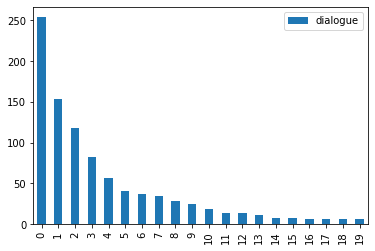

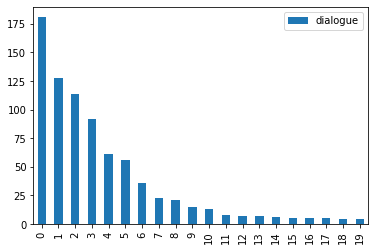

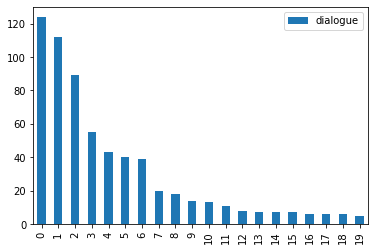

In [14]:
# plt.style.use('ggplot')
# # ep4
# new_df_ep4[['character','dialogue']].plot(kind='bar',title='Dialogue by top 20 character ep4',figsize=(15,20),legend=True)

# # ep5
# new_df_ep5[['character','dialogue']].plot(kind='bar',title='Dialogue by top 20 character ep5',figsize=(15,20),legend=True)

# #ep6
# new_df_ep6[['character','dialogue']].plot(kind='bar',title='Dialogue by top 20 character ep6',figsize=(15,20),legend=True)

new_df_ep4.plot.bar()
new_df_ep5.plot.bar()
new_df_ep6.plot.bar()


## Ploting most frequents of bigrams for each episode

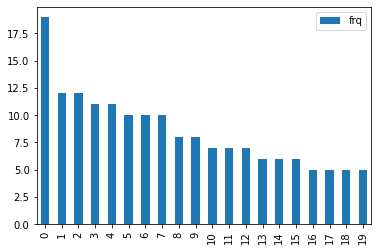

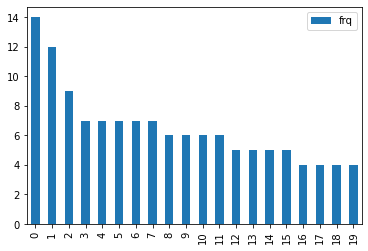

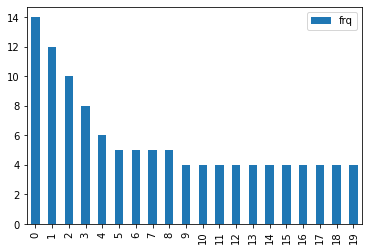

In [15]:
bigram_df_ep4.plot.bar()
bigram_df_ep5.plot.bar()
bigram_df_ep6.plot.bar()

## The trilogy of three episodes 

In [16]:
ep4_dialogue_arr = clean_data(ep4)
ep5_dialogue_arr = clean_data(ep5)
ep6_dialogue_arr = clean_data(ep6)

def to_dataframe(ep,arr):
  ep.drop('dialogue',axis=1)
  ep['dialogue'] = arr
  return ep

## create trilogy dataframe

In [17]:
frams = [to_dataframe(ep4,ep4_dialogue_arr),to_dataframe(ep5,ep5_dialogue_arr),to_dataframe(ep6,ep6_dialogue_arr)]

trilogy = pd.concat(frams).reset_index(drop=True)

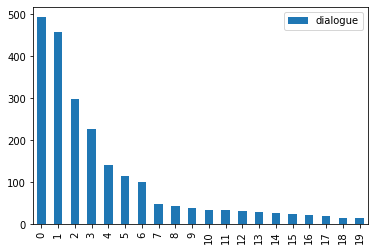

In [18]:
## get the top 20 character from trilogy

top_20_trilogy = trilogy.character.value_counts().head(20)

df_20_trilogy = series_to_df(top_20_trilogy)

df_20_trilogy.plot.bar()

## Most frequent bigrams in trilogy

        character  dialogue
0         obi wan        30
1      lord vader        26
2     master luke        24
3       dark side        20
4       luke luke        19
5          let go        18
6      death star        15
7     light speed        15
8       come back        14
9       look like        13
10  battl station        12
11         ye sir        12
12   captain solo        12
13     wan kenobi        12
14         r unit        12
15     rebel base        11
16  princess leia        11
17          oh oh        10
18         go get        10
19   star destroy        10


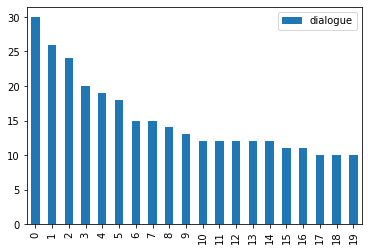

In [19]:
x = trilogy.dialogue.str.split(expand=True).stack()

y = x + ' ' + x.shift(-1)

trilogy_bigrams = y.dropna().reset_index(drop=True)

trilogy_bigrams_df = series_to_df(most_freq_bigrams(trilogy_bigrams))

print(trilogy_bigrams_df)
trilogy_bigrams_df.plot.bar()

In [20]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
trilogy['dialogue'] = trilogy['dialogue'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
dialogue_list = list(trilogy['dialogue'])

dialogue_list

[['hear', 'shut', 'main', 'reactor', 'destroy', 'sure', 'mad'],
 ['hear', 'shut', 'main', 'reactor', 'destroy', 'sure', 'mad'],
 ['doom'],
 ['escap', 'princess', 'time'],
 [],
 ['known',
  'better',
  'trust',
  'logic',
  'half',
  'size',
  'thermocapsulari',
  'dehous',
  'assist'],
 ['hurri', 'come', 'wait', 'get', 'gear'],
 ['artoo', 'artoo', 'detoo'],
 ['last'],
 ['head', 'direct', 'go', 'sent', 'spice', 'mine', 'kessel', 'smash', 'know'],
 ['wait', 'minut', 'go'],
 ['death', 'star', 'plan', 'main', 'comput'],
 ['transmiss', 'intercept'],
 ['intercept', 'transmiss', 'aaah', 'consular', 'ship', 'diplomat', 'mission'],
 ['consular', 'ship', 'ambassador'],
 ['command',
  'tear',
  'ship',
  'apart',
  'found',
  'plan',
  'bring',
  'ambassador',
  'want',
  'aliv'],
 ['set', 'stun'],
 ['right', 'inform', 'lord', 'vader', 'prison'],
 ['hey', 'permit', 'restrict', 'deactiv', 'sure'],
 ['call',
  'mindless',
  'philosoph',
  'overweight',
  'glob',
  'greas',
  'come',
  'somebodi',
 

In [22]:
import itertools

dialogue_list_merged = list(itertools.chain.from_iterable(dialogue_list))

dialogue_list_merged

['hear',
 'shut',
 'main',
 'reactor',
 'destroy',
 'sure',
 'mad',
 'hear',
 'shut',
 'main',
 'reactor',
 'destroy',
 'sure',
 'mad',
 'doom',
 'escap',
 'princess',
 'time',
 'known',
 'better',
 'trust',
 'logic',
 'half',
 'size',
 'thermocapsulari',
 'dehous',
 'assist',
 'hurri',
 'come',
 'wait',
 'get',
 'gear',
 'artoo',
 'artoo',
 'detoo',
 'last',
 'head',
 'direct',
 'go',
 'sent',
 'spice',
 'mine',
 'kessel',
 'smash',
 'know',
 'wait',
 'minut',
 'go',
 'death',
 'star',
 'plan',
 'main',
 'comput',
 'transmiss',
 'intercept',
 'intercept',
 'transmiss',
 'aaah',
 'consular',
 'ship',
 'diplomat',
 'mission',
 'consular',
 'ship',
 'ambassador',
 'command',
 'tear',
 'ship',
 'apart',
 'found',
 'plan',
 'bring',
 'ambassador',
 'want',
 'aliv',
 'set',
 'stun',
 'right',
 'inform',
 'lord',
 'vader',
 'prison',
 'hey',
 'permit',
 'restrict',
 'deactiv',
 'sure',
 'call',
 'mindless',
 'philosoph',
 'overweight',
 'glob',
 'greas',
 'come',
 'somebodi',
 'see',
 'secre

## Frequency of each statment

Text(0, 0.5, 'dialogue')

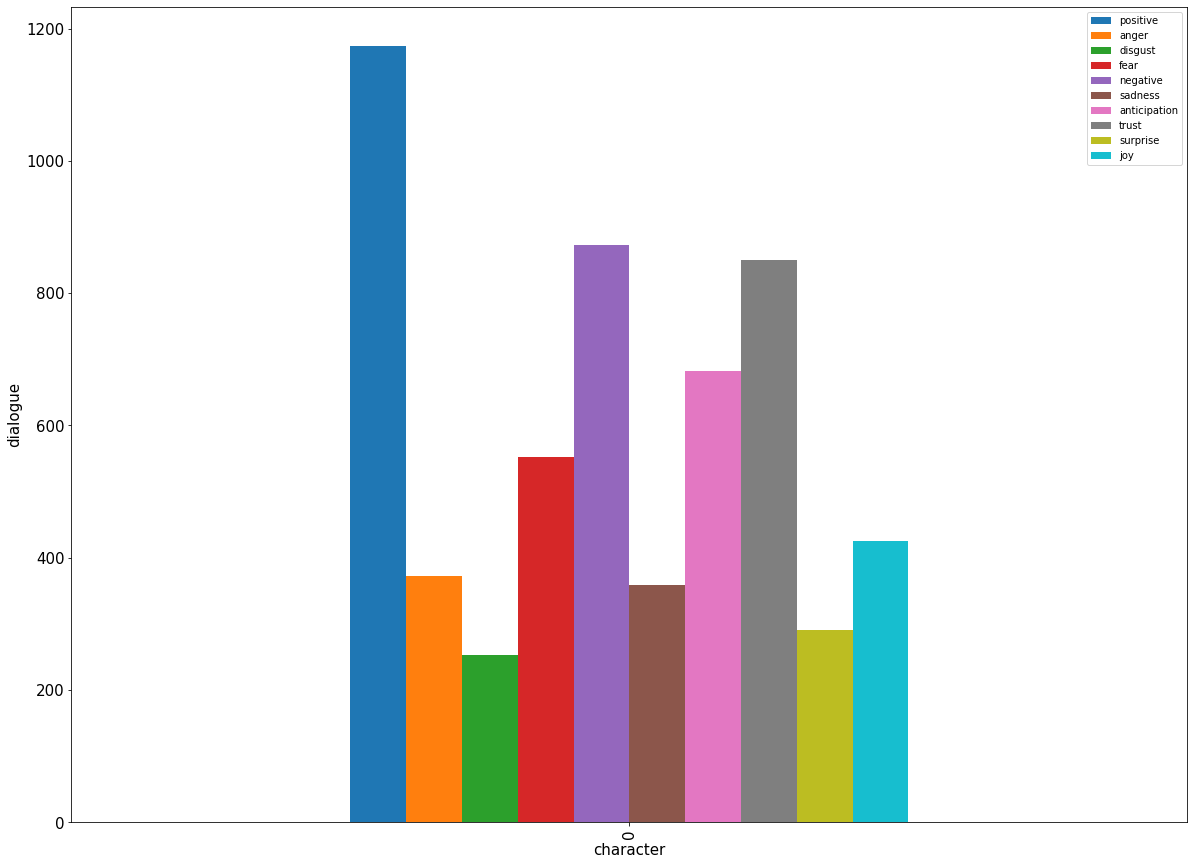

In [23]:
from collections import defaultdict,OrderedDict,Counter
import csv
wordlist = defaultdict(list)
emotions = defaultdict(list)

with open('/content/drive/MyDrive/bigdata_projects/Text Mining/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt','r') as file_:
  reader = csv.reader(file_,delimiter='\t')

  header = [i for i in range(46)]

  for row in header:
    next(reader)
  
  for w,e,pres in reader:
    if int(pres) == 1:
      wordlist[w].append(e)
      emotions[e].append(w)

def emotions_counter(strPar,wt):
  emotion_counter = Counter()
  for token in dialogue_list_merged:
    emotion_counter+=Counter(wordlist[token])

  return emotion_counter


wt = list(itertools.chain.from_iterable(dialogue_list))
emotions_counter = [emotions_counter(trilogy,wt)]

dialogues = trilogy['dialogue']

emotion_df = pd.DataFrame(emotions_counter)
emotion_df = emotion_df.fillna(0)

axes = emotion_df.plot(kind='bar',figsize=(20,15),fontsize=15)
axes.set_xlabel('character',fontsize=15)
axes.set_ylabel('dialogue',fontsize=15)


In [28]:
sentiments = pd.read_csv('/content/drive/MyDrive/bigdata_projects/Text Mining/data/NRC_emotion_lexicon_list.txt',delimiter='\t',header=None)

sentiments.columns = ['Word','Emotion','isPres']

final_sent = sentiments[sentiments['isPres'] == 1]

final_sent.head

<bound method NDFrame.head of              Word       Emotion  isPres
19         abacus         trust       1
23        abandon          fear       1
25        abandon      negative       1
27        abandon       sadness       1
30      abandoned         anger       1
...           ...           ...     ...
141741       zest  anticipation       1
141744       zest           joy       1
141746       zest      positive       1
141749       zest         trust       1
141755        zip      negative       1

[13901 rows x 3 columns]>

## Get the similer words from dialogue with word in sentiment
## to define the emotion of this dialogue

In [31]:
sent_word = pd.DataFrame(columns=['Word','Emotion'])

for w in dialogue_list_merged:
  df = final_sent[final_sent['Word'] == w][['Word','Emotion']]
  sent_word = sent_word.append(df)

sent_word = sent_word.reset_index()
sent_word.head()

,index,Word,Emotion
0,76026,main,positive
1,75730,mad,anger
2,75732,mad,disgust
3,75733,mad,fear
4,75735,mad,negative


In [58]:
final_sent2 = sent_word.groupby(['Emotion','Word']).count()
final_sent2 = final_sent2.reset_index().sort_values(by=['Emotion','index'],ascending=True)
final_sent2 = final_sent2[final_sent2['Word'] != 'ill']
final_sent3 = final_sent2.groupby('Emotion').apply(lambda x: x.nlargest(10,'index')).reset_index(drop=True)
final_sent3

,Emotion,Word,index
0,anger,rebel,33
1,anger,attack,31
2,anger,bad,24
3,anger,blast,20
4,anger,death,18
...,...,...,...
95,trust,lord,42
96,trust,star,32
97,trust,leader,29
98,trust,found,23


## Most frequents word for each sentiments in dialogue

{'anger', 'positive', 'trust', 'disgust', 'negative', 'fear', 'joy', 'sadness', 'anticipation', 'surprise'}


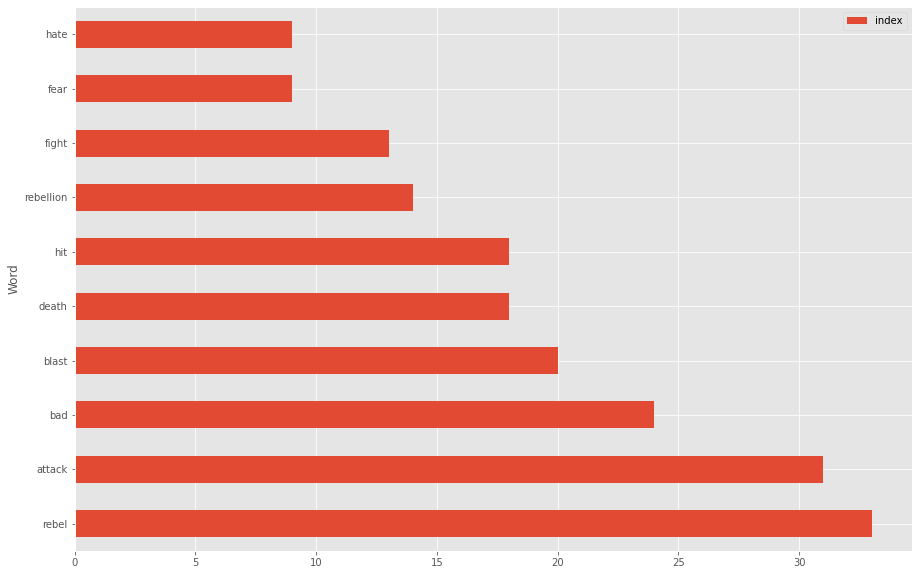

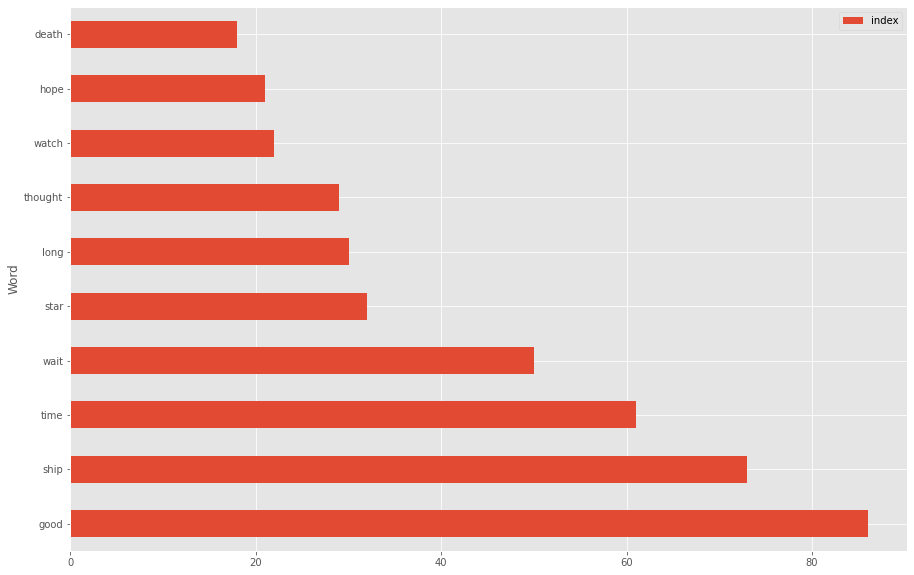

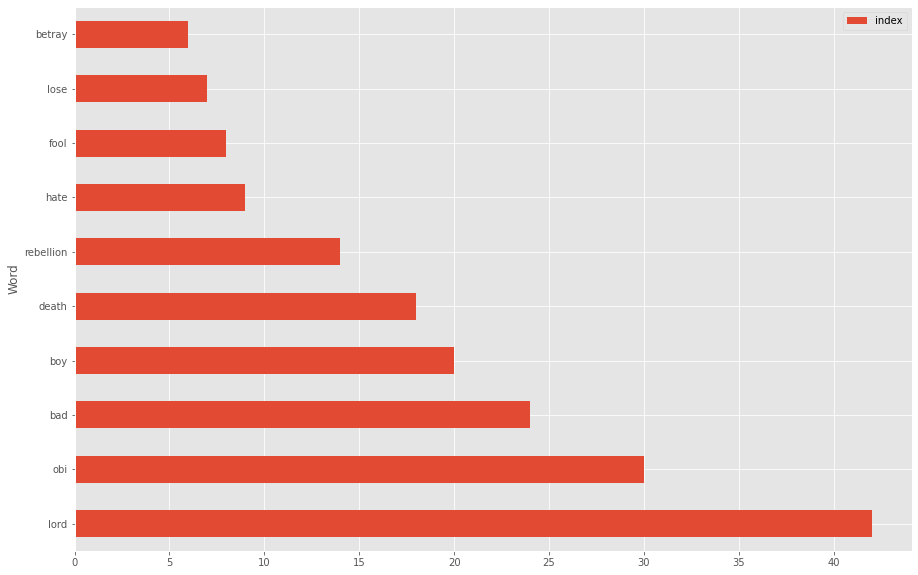

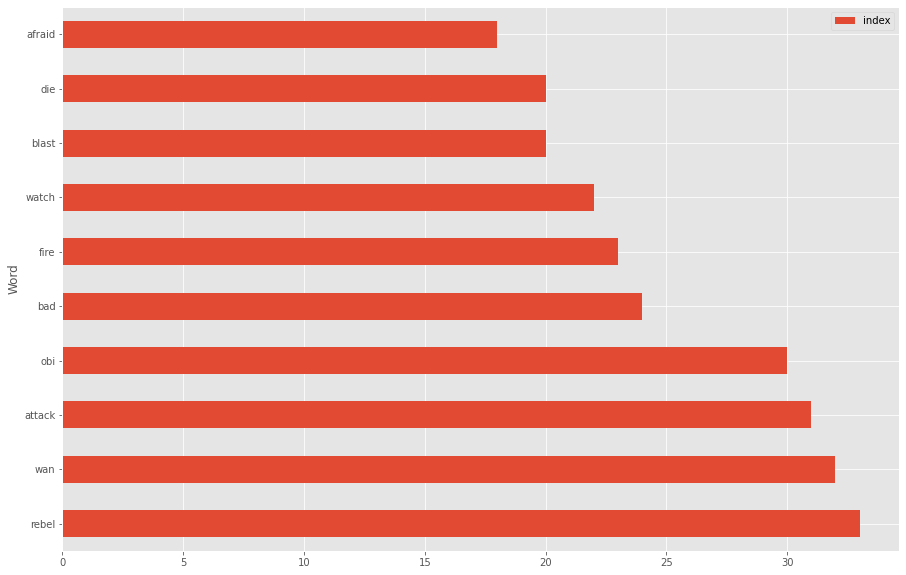

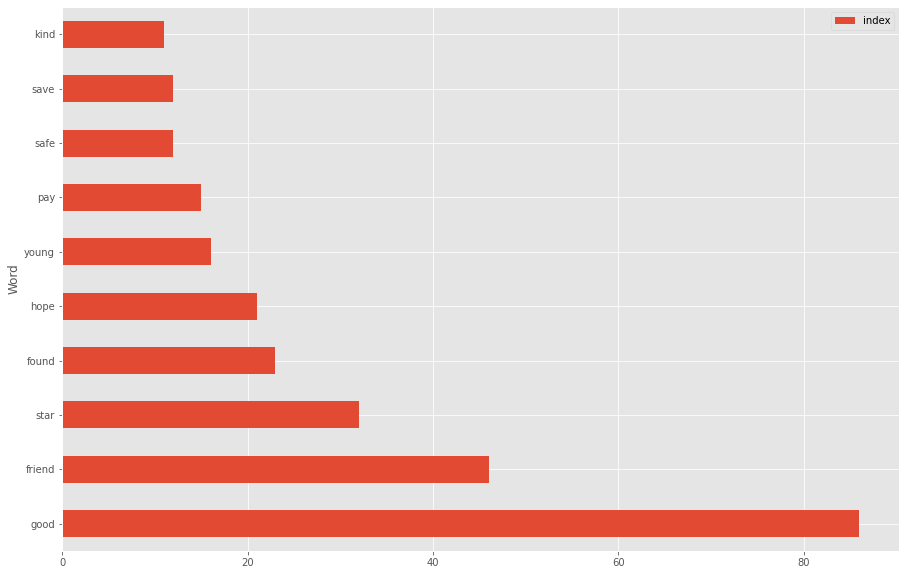

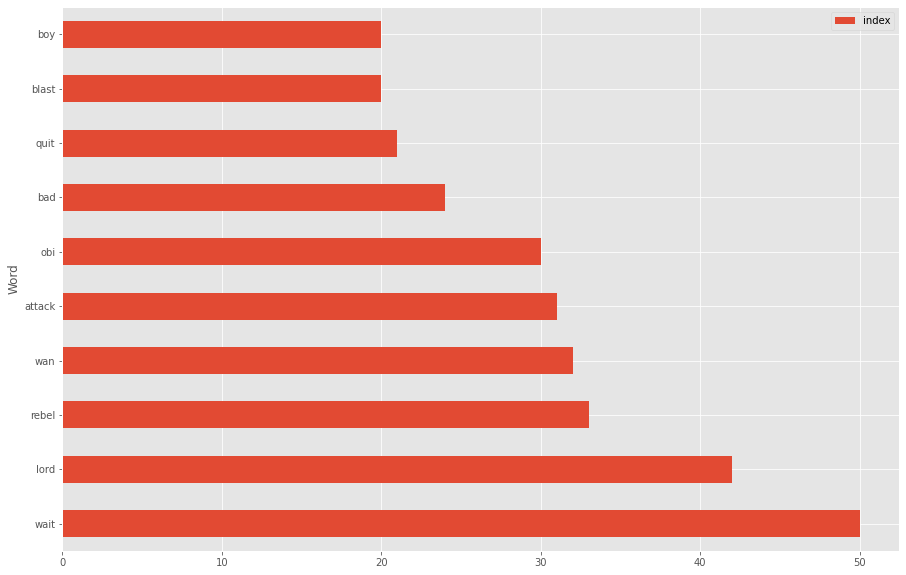

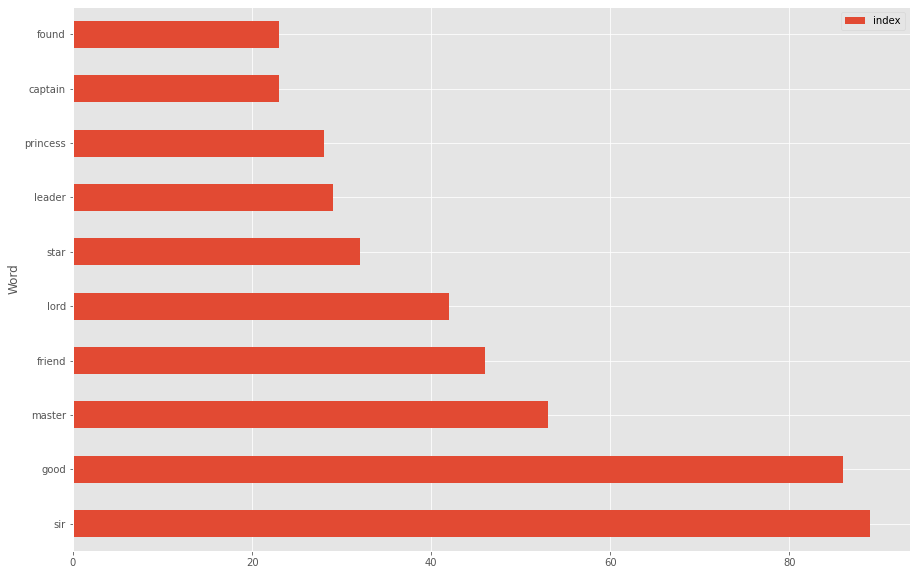

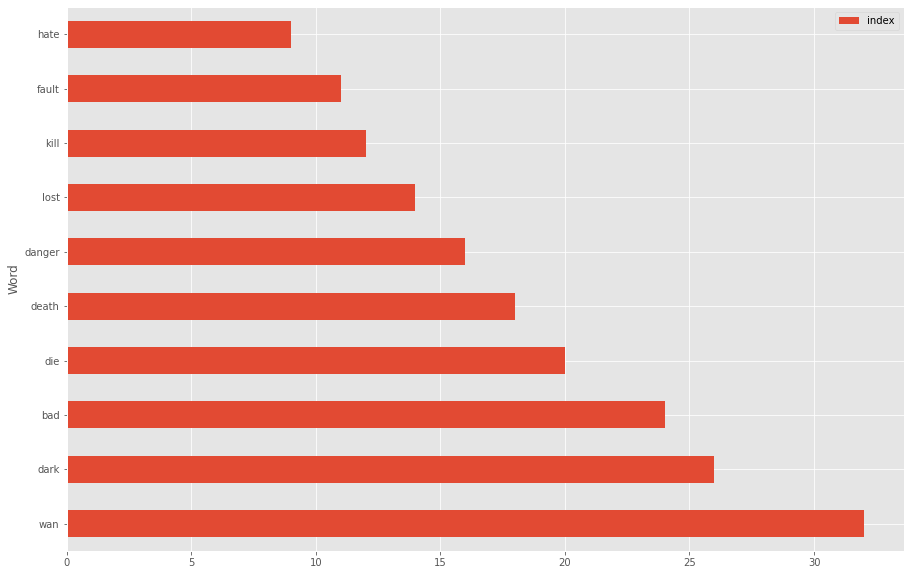

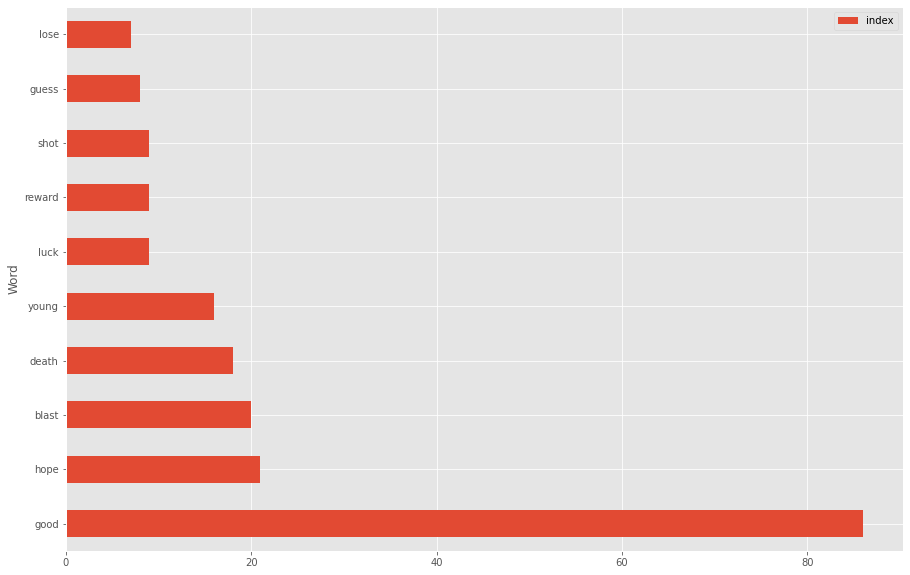

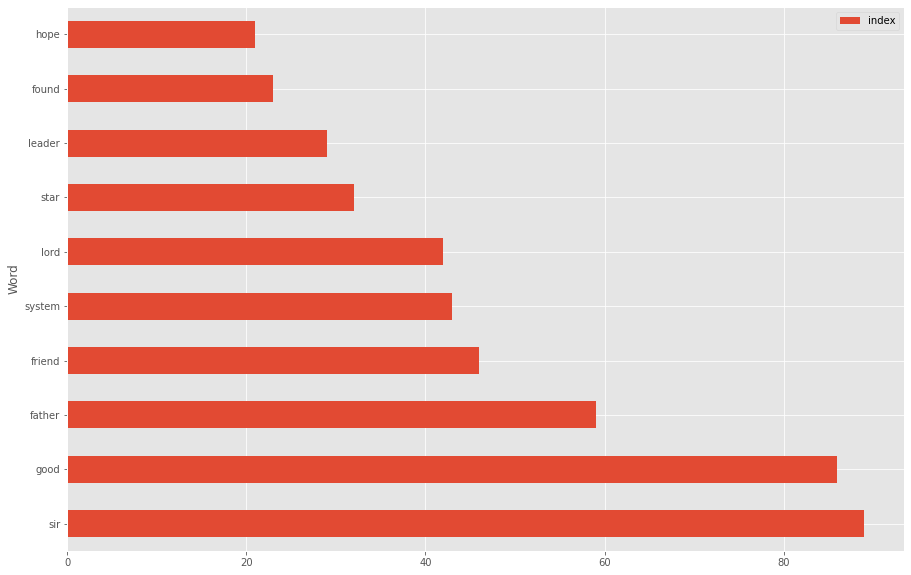

In [59]:
print(set(final_sent3['Emotion']))
plt.style.use('ggplot')
p = final_sent3.groupby('Emotion').plot(x='Word', y='index', kind = 'barh',figsize=(15,10),legend=True)
# p + geom_bar(stat = "identity") + facet_wrap('Emotion') + coord_flip()